In [2]:
# Import pandas
import pandas as pd

# Load the CSV data into DataFrames
super_bowls =pd.read_csv('./datasets/super_bowls.csv')
tv = pd.read_csv('./datasets/tv.csv')
halftime_musicians = pd.read_csv('./datasets/halftime_musicians.csv')

# Display the first five rows of each DataFrame
display(super_bowls.head(5))
display(tv.head(5))
display(halftime_musicians.head(5))

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


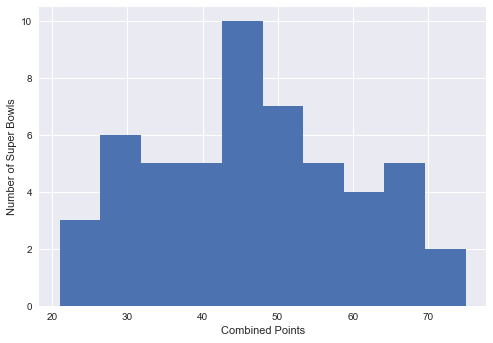

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


In [3]:
# Import matplotlib and set plotting style
from matplotlib import pyplot  as plt
import pandas as pd
# allows us to display graphs without plt.show()
%matplotlib inline
plt.style.use('seaborn')

# Plot a histogram of combined points
plt.xlabel('Combined Points')
plt.ylabel('Number of Super Bowls')

plt.hist(super_bowls["combined_pts"],10)
plt.show()

# Display the Super Bowls with the highest and lowest combined scores
display(super_bowls[super_bowls['combined_pts'] > 70])
display(super_bowls[super_bowls['combined_pts'] < 25])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            52 non-null     object
 1   super_bowl      52 non-null     int64 
 2   venue           52 non-null     object
 3   city            52 non-null     object
 4   state           52 non-null     object
 5   attendance      52 non-null     int64 
 6   team_winner     52 non-null     object
 7   winning_pts     52 non-null     int64 
 8   qb_winner_1     52 non-null     object
 9   qb_winner_2     2 non-null      object
 10  coach_winner    52 non-null     object
 11  team_loser      52 non-null     object
 12  losing_pts      52 non-null     int64 
 13  qb_loser_1      52 non-null     object
 14  qb_loser_2      3 non-null      object
 15  coach_loser     52 non-null     object
 16  combined_pts    52 non-null     int64 
 17  difference_pts  52 non-null     int64 
dtypes: int64(6),

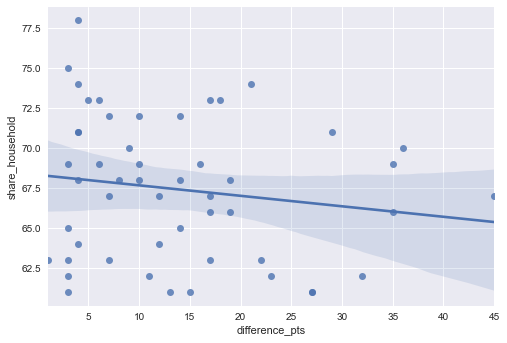

In [4]:
# Join game and TV data, filtering out SB I because it was split over two networks
games_tv = pd.merge(tv[tv['super_bowl'] > 1], super_bowls, on='super_bowl')
super_bowls.info()
tv.info()
games_tv.info()
import seaborn as sns
# Create a scatter plot with a linear regression model fit
sns.regplot(x=games_tv.difference_pts, y=games_tv.share_household,data=games_tv)


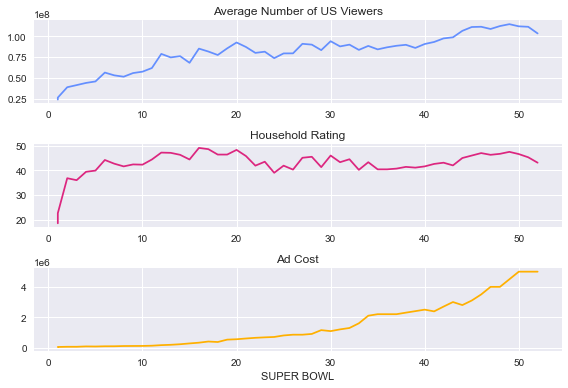

In [5]:
# Create a figure with 3x1 subplot and activate the top subplot
import matplotlib.pyplot as plt
plt.subplot(3, 1, 1)
plt.plot(tv.super_bowl,tv.avg_us_viewers, color="#648FFF")
plt.title('Average Number of US Viewers')

# Activate the middle subplot
plt.subplot(3, 1, 2)
plt.plot(tv.super_bowl, tv.rating_household, color="#DC267F")
plt.title('Household Rating')

# Activate the bottom subplot
plt.subplot(3, 1, 3)
plt.plot(tv.super_bowl, tv.ad_cost , color="#FFB000")
plt.title('Ad Cost')
plt.xlabel('SUPER BOWL')

# Improve the spacing between subplots
plt.tight_layout()

In [6]:
# Display all halftime musicians for Super Bowls up to and including Super Bowl XXVII
#super_bowls.info()
#tv.info()
halftime_musicians = pd.read_csv('./datasets/halftime_musicians.csv')
halftime_musicians[halftime_musicians['super_bowl'] >=27]

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0
...,...,...,...
76,28,Tanya Tucker,2.0
77,28,Travis Tritt,2.0
78,28,The Judds,1.0
79,28,Wynonna Judd,2.0


In [7]:
# Count halftime show appearances for each musician and sort them from most to least
halftime_appearances = halftime_musicians.groupby('musician').count()['super_bowl'].reset_index()
halftime_appearances = halftime_appearances.sort_values('super_bowl', ascending=False)

# Display musicians with more than one halftime show appearance
halftime_appearances[halftime_appearances.super_bowl>1]

,musician,super_bowl
28,Grambling State University Tiger Marching Band,6
104,Up with People,4
1,Al Hirt,4
83,The Human Jukebox,3
76,Spirit of Troy,2
25,Florida A&M University Marching 100 Band,2
26,Gloria Estefan,2
102,University of Minnesota Marching Band,2
10,Bruno Mars,2
64,Pete Fountain,2


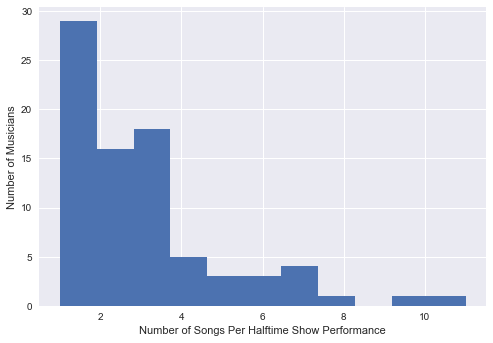

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
70,30,Diana Ross,10.0
10,49,Katy Perry,8.0
2,51,Lady Gaga,7.0
90,23,Elvis Presto,7.0
33,41,Prince,7.0
16,47,Beyoncé,7.0
14,48,Bruno Mars,6.0
3,50,Coldplay,6.0
25,45,The Black Eyed Peas,6.0


In [8]:
# Filter out most marching bands
no_bands = halftime_musicians[~halftime_musicians.musician.str.contains('Marching')]
no_bands = no_bands[~no_bands.musician.str.contains('Spirit')]

# Plot a histogram of number of songs per performance
most_songs = int(max(no_bands['num_songs'].values))
plt.hist(no_bands.num_songs.dropna(), bins=most_songs)
plt.ylabel('Number of Musicians')
plt.xlabel('Number of Songs Per Halftime Show Performance')
plt.show()

# Sort the non-band musicians by number of songs per appearance...
no_bands = no_bands.sort_values('num_songs', ascending=False)
# ...and display the top 15
display(no_bands.head(15))

In [9]:
# 2018-2019 conference champions
patriots = 'New England Patriots'
rams = 'Los Angeles Rams'
# Who will win Super Bowl LIII?
super_bowl_LIII_winner = patriots
print('The winner of Super Bowl LIII will be the', super_bowl_LIII_winner)

The winner of Super Bowl LIII will be the New England Patriots


In [10]:
#import pandas as pd
import warnings
warnings.filterwarnings('ignore')

homelessness=pd.read_csv('./datasets/2007-2016-Homelessnewss-USA.csv')
print(homelessness.head())
print(homelessness.info())
print(homelessness.shape)
print(homelessness.describe())

Year State CoC Number       CoC Name  \
0  1/1/2007    AK     AK-500  Anchorage CoC   
1  1/1/2007    AK     AK-500  Anchorage CoC   
2  1/1/2007    AK     AK-500  Anchorage CoC   
3  1/1/2007    AK     AK-500  Anchorage CoC   
4  1/1/2007    AK     AK-500  Anchorage CoC   

                                     Measures Count  
0            Chronically Homeless Individuals   224  
1                        Homeless Individuals   696  
2                 Homeless People in Families   278  
3  Sheltered Chronically Homeless Individuals   187  
4                          Sheltered Homeless   842  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86529 entries, 0 to 86528
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        86529 non-null  object
 1   State       86529 non-null  object
 2   CoC Number  86529 non-null  object
 3   CoC Name    86529 non-null  object
 4   Measures    86529 non-null  object
 5   Count  

In [11]:
# Import pandas using the alias pd
import pandas as pd

# Print the values of homelessness
print(homelessness.values)

# Print the column index of homelessness
print(homelessness.columns)

# Print the row index of homelessness
print(homelessness.index)

[['1/1/2007' 'AK' 'AK-500' 'Anchorage CoC'
  'Chronically Homeless Individuals' '224']
 ['1/1/2007' 'AK' 'AK-500' 'Anchorage CoC' 'Homeless Individuals' '696']
 ['1/1/2007' 'AK' 'AK-500' 'Anchorage CoC' 'Homeless People in Families'
  '278']
 ...
 ['1/1/2016' 'WY' 'WY-500' 'Wyoming Statewide CoC'
  'Unsheltered Parenting Youth (Under 25)' '3']
 ['1/1/2016' 'WY' 'WY-500' 'Wyoming Statewide CoC'
  'Unsheltered Parenting Youth Age 18-24' '3']
 ['1/1/2016' 'WY' 'WY-500' 'Wyoming Statewide CoC'
  'Unsheltered Parenting Youth Under 18' '0']]
Index(['Year', 'State', 'CoC Number', 'CoC Name', 'Measures', 'Count'], dtype='object')
RangeIndex(start=0, stop=86529, step=1)


In [13]:
# Sort homelessness by individual
print(homelessness.columns)
homelessness_meas = homelessness.sort_values("Measures",ascending=False)

# Print the top few rows
print(homelessness_meas.head())

Index(['Year', 'State', 'CoC Number', 'CoC Name', 'Measures', 'Count'], dtype='object')
           Year State CoC Number  \
86528  1/1/2016    WY     WY-500   
81194  1/1/2016    NY     NY-507   
61202  1/1/2015    MI     MI-514   
81236  1/1/2016    NY     NY-508   
61160  1/1/2015    MI     MI-513   

                                                CoC Name  \
86528                              Wyoming Statewide CoC   
81194                      Schenectady City & County CoC   
61202                    Battle Creek/Calhoun County CoC   
81236  Buffalo, Niagara Falls/Erie, Niagara, Orleans,...   
61160                      Marquette, Alger Counties CoC   

                                   Measures Count  
86528  Unsheltered Parenting Youth Under 18     0  
81194  Unsheltered Parenting Youth Under 18     0  
61202  Unsheltered Parenting Youth Under 18     0  
81236  Unsheltered Parenting Youth Under 18     0  
61160  Unsheltered Parenting Youth Under 18     0  


In [14]:
# Sort homelessness by region, then descending family members
homelessness_reg_fam = homelessness.sort_values(["Year","CoC Number"],ascending=[True,False])

# Print the top few rows
print(homelessness_reg_fam.head())

Year State CoC Number               CoC Name  \
4812  1/1/2007    WY     WY-500  Wyoming Statewide CoC   
4813  1/1/2007    WY     WY-500  Wyoming Statewide CoC   
4814  1/1/2007    WY     WY-500  Wyoming Statewide CoC   
4815  1/1/2007    WY     WY-500  Wyoming Statewide CoC   
4816  1/1/2007    WY     WY-500  Wyoming Statewide CoC   

                                        Measures Count  
4812            Chronically Homeless Individuals    38  
4813                        Homeless Individuals   331  
4814                 Homeless People in Families   206  
4815  Sheltered Chronically Homeless Individuals     0  
4816                          Sheltered Homeless   397  


In [15]:
# Filter for rows where coc_number is greater than B
coc_number_gt_b = homelessness[homelessness["CoC Number"]>"B"]

# See the result
print(coc_number_gt_b)

Year State CoC Number                                CoC Name  \
264    1/1/2007    CA     CA-500  San Jose/Santa Clara City & County CoC   
265    1/1/2007    CA     CA-500  San Jose/Santa Clara City & County CoC   
266    1/1/2007    CA     CA-500  San Jose/Santa Clara City & County CoC   
267    1/1/2007    CA     CA-500  San Jose/Santa Clara City & County CoC   
268    1/1/2007    CA     CA-500  San Jose/Santa Clara City & County CoC   
...         ...   ...        ...                                     ...   
86524  1/1/2016    WY     WY-500                   Wyoming Statewide CoC   
86525  1/1/2016    WY     WY-500                   Wyoming Statewide CoC   
86526  1/1/2016    WY     WY-500                   Wyoming Statewide CoC   
86527  1/1/2016    WY     WY-500                   Wyoming Statewide CoC   
86528  1/1/2016    WY     WY-500                   Wyoming Statewide CoC   

                                                Measures  Count  
264                     Chronica

In [91]:
# Subset for rows in South Atlantic or Mid-Atlantic regions
measures=["Homeless Individuals","Sheltered Homeless"]
some_measures =homelessness[homelessness["Measures"].isin(measures)]

# See the result
print(some_measures)

Year State CoC Number  \
1      1/1/2007    AK     AK-500   
4      1/1/2007    AK     AK-500   
13     1/1/2007    AK     AK-501   
16     1/1/2007    AK     AK-501   
25     1/1/2007    AL     AL-500   
...         ...   ...        ...   
86420  1/1/2016    WV     WV-503   
86449  1/1/2016    WV     WV-508   
86462  1/1/2016    WV     WV-508   
86491  1/1/2016    WY     WY-500   
86504  1/1/2016    WY     WY-500   

                                                CoC Name  \
1                                          Anchorage CoC   
4                                          Anchorage CoC   
13                           Alaska Balance of State CoC   
16                           Alaska Balance of State CoC   
25     Birmingham/Jefferson, St. Clair, Shelby Counti...   
...                                                  ...   
86420  Charleston/Kanawha, Putnam, Boone, Clay Counti...   
86449                 West Virginia Balance of State CoC   
86462                 West Virginia Ba

In [123]:
# Create indiv_per_10k col as homeless individuals per 10k state pop

#homelessness["indiv_per_10k"] = 10000 * homelessness["individuals"] / homelessness["state_pop"] 

# Subset rows for indiv_per_10k greater than 20
#high_homelessness = homelessness[homelessness["indiv_per_10k"]>20]

# Sort high_homelessness by descending indiv_per_10k
#high_homelessness_srt = high_homelessness.sort_values("indiv_per_10k",ascending=False)

# From high_homelessness_srt, select the state and indiv_per_10k cols
#result = high_homelessness_srt[["state","indiv_per_10k"]]

# See the result
#print(result)

In [16]:
#cannot find orijinal datacamp sales data, so i used kaggle features and sales then merge on two columns: date, store
sales_csv=pd.read_csv('./datasets/sales_dataset.csv')
feature=pd.read_csv('./datasets/features.csv')
stores=pd.read_csv('./datasets/stores_dataset.csv')
sales = pd.merge(sales_csv, feature, on=['date','store','is_holiday'])
sales = pd.merge(sales, stores, on=['store'])

# Print the head of the sales DataFrame
print(sales.head())
# Print the info about the sales DataFrame
print(sales.info())

# Print the mean of weekly_sales
print(sales['weekly_sales'].mean())

# Print the median of weekly_sales
print(sales['weekly_sales'].median())


store  department        date  weekly_sales  is_holiday  temperature_c  \
0      1           1  05/02/2010      24924.50       False          42.31   
1      1           2  05/02/2010      50605.27       False          42.31   
2      1           3  05/02/2010      13740.12       False          42.31   
3      1           4  05/02/2010      39954.04       False          42.31   
4      1           5  05/02/2010      32229.38       False          42.31   

   fuel_price_usd_per_l  markDown1  MarkDown2  MarkDown3  MarkDown4  \
0                 2.572        NaN        NaN        NaN        NaN   
1                 2.572        NaN        NaN        NaN        NaN   
2                 2.572        NaN        NaN        NaN        NaN   
3                 2.572        NaN        NaN        NaN        NaN   
4                 2.572        NaN        NaN        NaN        NaN   

   MarkDown5         CPI  unemployment type    size  
0        NaN  211.096358         8.106    A  151315  
1    

In [17]:
# Print the maximum of the date column
print(sales['date'].max())

# Print the minimum of the date column
print(sales['date'].min())

31/12/2010
01/04/2011


In [19]:
import numpy as np
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales["temperature_c"].agg(iqr))

# Update to print IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg(iqr))
# Update to print IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr,np.median]))

27.6
temperature_c           27.600
fuel_price_usd_per_l     0.805
unemployment             1.681
dtype: float64
        temperature_c  fuel_price_usd_per_l  unemployment
iqr             27.60                 0.805         1.681
median          62.09                 3.452         7.866


In [161]:
# Sort sales_1_1 by date
# there is not sales_1_1 in local, use sales instead of this.
sales_1_1 = sales.sort_values('date')

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1['cum_weekly_sales'] = sales_1_1['weekly_sales'].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col

sales_1_1['cum_max_sales'] = sales_1_1['weekly_sales'].cummax()
# See the columns you calculated
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

date  weekly_sales  cum_weekly_sales  cum_max_sales
261048  01/04/2011       9880.30      9.880300e+03        9880.30
33836   01/04/2011      51382.98      6.126328e+04       51382.98
33835   01/04/2011      11476.27      7.273955e+04       51382.98
33834   01/04/2011      87803.95      1.605435e+05       87803.95
33833   01/04/2011      33809.56      1.943531e+05       87803.95
...            ...           ...               ...            ...
131398  31/12/2010      20582.52      6.737144e+09      693099.36
131397  31/12/2010      48227.71      6.737193e+09      693099.36
131396  31/12/2010       2633.58      6.737195e+09      693099.36
23509   31/12/2010        912.69      6.737196e+09      693099.36
400286  31/12/2010      22940.03      6.737219e+09      693099.36

[421570 rows x 4 columns]


In [20]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset="store")
print(store_types.head())

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=["store","department"])
print(store_depts.head())

# Subset the rows that are holiday weeks and drop duplicate dates
holiday_dates = sales[sales["is_holiday"]].drop_duplicates(subset="date")

# Print date col of holiday_dates
print(holiday_dates["date"])

store  department        date  weekly_sales  is_holiday  temperature_c  \
0          1           1  05/02/2010      24924.50       False          42.31   
10244      2           1  05/02/2010      35034.06       False          40.19   
20482      3           1  05/02/2010       6453.58       False          45.71   
29518      4           1  05/02/2010      38724.42       False          43.76   
39790      5           1  05/02/2010       9323.89       False          39.70   

       fuel_price_usd_per_l  markDown1  MarkDown2  MarkDown3  MarkDown4  \
0                     2.572        NaN        NaN        NaN        NaN   
10244                 2.572        NaN        NaN        NaN        NaN   
20482                 2.572        NaN        NaN        NaN        NaN   
29518                 2.598        NaN        NaN        NaN        NaN   
39790                 2.572        NaN        NaN        NaN        NaN   

       MarkDown5         CPI  unemployment type    size  
0          

In [21]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=["store", "type"])

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=["store", "department"])

In [204]:

# Count the number of stores of each type
store_counts = store_types["type"].value_counts()
print(store_counts)

# Get the proportion of stores of each type
store_props =store_types["type"].value_counts(normalize=True)
print(store_props)

# Count the number of each department number and sort
dept_counts_sorted = store_depts["department"].value_counts(sort=True)
print(dept_counts_sorted)

# Get the proportion of departments of each number and sort
dept_props_sorted = store_depts["department"].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

A    22
B    17
C     6
Name: type, dtype: int64
A    0.488889
B    0.377778
C    0.133333
Name: type, dtype: float64
1     45
9     45
52    45
56    45
60    45
      ..
37    20
50    14
43     5
39     5
65     1
Name: department, Length: 81, dtype: int64
1     0.013509
9     0.013509
52    0.013509
56    0.013509
60    0.013509
        ...   
37    0.006004
50    0.004203
43    0.001501
39    0.001501
65    0.000300
Name: department, Length: 81, dtype: float64


In [22]:
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

[0.64284903 0.2969624  0.06018856]


In [223]:
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")['weekly_sales'].sum()

# Get proportion for each type
sales_propn_by_type = sales_by_type/sales_by_type.sum()
print(sales_propn_by_type)

# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(["type","is_holiday"])["weekly_sales"].sum()
print(sales_by_type_is_holiday)

type
A    0.642849
B    0.296962
C    0.060189
Name: weekly_sales, dtype: float64
type  is_holiday
A     False         4.007612e+09
      True          3.234028e+08
B     False         1.847060e+09
      True          1.536410e+08
C     False         3.772478e+08
      True          2.825570e+07
Name: weekly_sales, dtype: float64


In [23]:
# Import NumPy with the alias np
import numpy as np
agg_op=[np.min,max,np.mean,np.median]
# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby("type")["weekly_sales"].agg(agg_op)

# Print sales_stats
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby("type")["unemployment","fuel_price_usd_per_l"].agg(agg_op)

# Print unemp_fuel_stats
print(unemp_fuel_stats)

amin        max          mean    median
type                                            
A    -4988.94  474330.10  20099.568043  10105.17
B    -3924.00  693099.36  12237.075977   6187.87
C     -379.00  112152.35   9519.532538   1149.67
     unemployment                          fuel_price_usd_per_l         \
             amin     max      mean median                 amin    max   
type                                                                     
A           3.879  14.313  7.791595  7.818                2.472  4.468   
B           4.125  14.313  7.928836  7.872                2.514  4.468   
C           5.217  14.313  8.934350  8.300                2.514  4.468   

                       
          mean median  
type                   
A     3.343999  3.417  
B     3.382523  3.494  
C     3.364654  3.417  


In [24]:
# Pivot for mean weekly_sales for each store type
mean_sales_by_type = sales.pivot_table(index="type", values="weekly_sales")

# Print mean_sales_by_type
print(mean_sales_by_type)

weekly_sales
type              
A     20099.568043
B     12237.075977
C      9519.532538


In [25]:
# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table(index="type", values="weekly_sales", aggfunc=[np.mean, np.median])

# Print mean_med_sales_by_type
print(mean_med_sales_by_type)

mean       median
      weekly_sales weekly_sales
type                           
A     20099.568043     10105.17
B     12237.075977      6187.87
C      9519.532538      1149.67


In [26]:
# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table(index=["type"], columns=["is_holiday"], values="weekly_sales")

# Print mean_sales_by_type_holiday
print(mean_sales_by_type_holiday)

is_holiday         False         True 
type                                  
A           20008.746759  21297.517824
B           12153.067752  13346.164062
C            9518.528116   9532.963131


In [27]:
# Print mean weekly_sales by department and type; fill missing values with 0
print(sales.pivot_table(values="weekly_sales", index="department",columns="type", fill_value=0,margins=True))

type                   A             B             C           All
department                                                        
1           22956.887886  17990.876158   8951.733462  19213.485088
2           51994.674873  43051.996919  14424.851713  43607.020113
3           13881.033137  12965.414311    820.276818  11793.698516
4           32973.814075  21259.895804  13669.370396  25974.630238
5           26803.448045  21184.602916    767.600774  21365.583515
...                  ...           ...           ...           ...
96          19900.943552   4745.183226  15766.025431  15210.942761
97          22093.807101   3727.100717  13419.542809  14255.576919
98          10979.816195    319.205901   5479.758054   6824.694889
99            431.443064     25.716667      8.330952    415.487065
All         20099.568043  12237.075977   9519.532538  15981.258123

[82 rows x 4 columns]


In [28]:
#get by kaggle, GlobalLandTemperaturesByMajorCity
temperatures=pd.read_csv('./datasets/temperatures.csv')


In [29]:
# Look at temperatures
print(temperatures)

# Index temperatures by city
temperatures_ind = temperatures.set_index('city')

# Look at temperatures_ind
print(temperatures_ind)

# Reset the index, keeping its contents
print(temperatures_ind.reset_index())

# Reset the index, dropping its contents
print(temperatures_ind.reset_index(drop=True))

date  avg_temp_c  AverageTemperatureUncertainty     city  \
0       1849-01-01      26.704                          1.435  Abidjan   
1       1849-02-01      27.434                          1.362  Abidjan   
2       1849-03-01      28.101                          1.612  Abidjan   
3       1849-04-01      26.140                          1.387  Abidjan   
4       1849-05-01      25.427                          1.200  Abidjan   
...            ...         ...                            ...      ...   
239172  2013-05-01      18.979                          0.807     Xian   
239173  2013-06-01      23.522                          0.647     Xian   
239174  2013-07-01      25.251                          1.042     Xian   
239175  2013-08-01      24.528                          0.840     Xian   
239176  2013-09-01         NaN                            NaN     Xian   

              country Latitude Longitude  
0       Côte D'Ivoire    5.63N     3.23W  
1       Côte D'Ivoire    5.63N     3.23

In [30]:
# Make a list of cities to subset on
cities = ["Moscow","Saint Petersburg"]

# Subset temperatures using square brackets
print(temperatures[temperatures["city"].isin(cities)])
# Subset temperatures_ind using .loc[]
print(temperatures_ind.loc[cities])

date  avg_temp_c  AverageTemperatureUncertainty  \
155196  1743-11-01      -2.570                          2.037   
155197  1743-12-01         NaN                            NaN   
155198  1744-01-01         NaN                            NaN   
155199  1744-02-01         NaN                            NaN   
155200  1744-03-01         NaN                            NaN   
...            ...         ...                            ...   
196675  2013-05-01      12.355                          0.195   
196676  2013-06-01      17.185                          0.413   
196677  2013-07-01      17.234                          0.273   
196678  2013-08-01      17.153                          0.279   
196679  2013-09-01         NaN                            NaN   

                    city country Latitude Longitude  
155196            Moscow  Russia   55.45N    36.85E  
155197            Moscow  Russia   55.45N    36.85E  
155198            Moscow  Russia   55.45N    36.85E  
155199           

In [31]:
# Index temperatures by country & city
temperatures_ind = temperatures.set_index(["country","city"])

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [("Brazil", "Rio De Janeiro"),("Pakistan", "Lahore")]

# Subset for rows to keep
print(temperatures_ind.loc[rows_to_keep])

date  avg_temp_c  \
country  city                                     
Brazil   Rio De Janeiro  1832-01-01      25.320   
         Rio De Janeiro  1832-02-01      26.584   
         Rio De Janeiro  1832-03-01      25.419   
         Rio De Janeiro  1832-04-01      23.405   
         Rio De Janeiro  1832-05-01      22.773   
...                             ...         ...   
Pakistan Lahore          2013-05-01      33.457   
         Lahore          2013-06-01      34.456   
         Lahore          2013-07-01      33.279   
         Lahore          2013-08-01      31.511   
         Lahore          2013-09-01         NaN   

                         AverageTemperatureUncertainty Latitude Longitude  
country  city                                                              
Brazil   Rio De Janeiro                          1.508   23.31S    42.82W  
         Rio De Janeiro                          3.841   23.31S    42.82W  
         Rio De Janeiro                          1.685   23.31S

In [32]:
# Sort temperatures_ind by index values
print(temperatures_ind.sort_index())

# Sort temperatures_ind by index values at the city level
print(temperatures_ind.sort_index(level=["city"]))

# Sort temperatures_ind by country then descending city
print(temperatures_ind.sort_index(level=["country","city"], ascending=[True,False]))

date  avg_temp_c  AverageTemperatureUncertainty  \
country     city                                                            
Afghanistan Kabul   1833-01-01       2.290                          2.487   
            Kabul   1833-02-01       3.319                          2.325   
            Kabul   1833-03-01       7.444                          2.733   
            Kabul   1833-04-01      13.576                          2.266   
            Kabul   1833-05-01      19.321                          2.362   
...                        ...         ...                            ...   
Zimbabwe    Harare  2013-05-01      18.298                          1.117   
            Harare  2013-06-01      17.020                          0.519   
            Harare  2013-07-01      16.299                          0.510   
            Harare  2013-08-01      19.232                          0.808   
            Harare  2013-09-01         NaN                            NaN   

                   Latit

In [33]:
#You can only slice an index if the index is sorted (using .sort_index()).
#To slice at the outer level, first and last can be strings.
#To slice at inner levels, first and last should be tuples.
#If you pass a single slice to .loc[], it will slice the rows.

temperatures_ind = temperatures.set_index(["country","city"])
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

# Subset rows from Pakistan to Russia
print(temperatures_srt.loc['Pakistan':'Russia'])

# Try to subset rows from Lahore to Moscow
print(temperatures_srt.loc['Lahore':'Moscow'])

# Subset rows from Pakistan, Lahore to Russia, Moscow
print(temperatures_srt.loc[('Pakistan','Lahore'):('Russia','Moscow')])

date  avg_temp_c  \
country  city                                       
Pakistan Faisalabad        1816-03-01      18.647   
         Faisalabad        1816-04-01      25.247   
         Faisalabad        1816-05-01      31.385   
         Faisalabad        1816-06-01      32.441   
         Faisalabad        1816-07-01      30.593   
...                               ...         ...   
Russia   Saint Petersburg  2013-05-01      12.355   
         Saint Petersburg  2013-06-01      17.185   
         Saint Petersburg  2013-07-01      17.234   
         Saint Petersburg  2013-08-01      17.153   
         Saint Petersburg  2013-09-01         NaN   

                           AverageTemperatureUncertainty Latitude Longitude  
country  city                                                                
Pakistan Faisalabad                                2.337   31.35N    73.51E  
         Faisalabad                                3.399   31.35N    73.51E  
         Faisalabad            

In [34]:
# Subset rows from India, Hyderabad to Iraq, Baghdad
print(temperatures_srt.loc[('India','Hyderabad'):('Iraq','Baghdad')])
# Subset columns from date to avg_temp_c
print(temperatures_srt.loc[:,'date':'avg_temp_c'])

# Subset in both directions at once
print(temperatures_srt.loc[('India','Hyderabad'):('Iraq','Baghdad'),'date':'avg_temp_c'])

date  avg_temp_c  AverageTemperatureUncertainty  \
country city                                                               
India   Hyderabad  1796-01-01      22.759                          2.322   
        Hyderabad  1796-02-01      25.094                          1.453   
        Hyderabad  1796-03-01      27.725                          2.443   
        Hyderabad  1796-04-01      31.280                          1.789   
        Hyderabad  1796-05-01      32.701                          1.406   
...                       ...         ...                            ...   
Iraq    Baghdad    2013-05-01      28.673                          0.724   
        Baghdad    2013-06-01      33.803                          0.836   
        Baghdad    2013-07-01      36.392                          1.021   
        Baghdad    2013-08-01      35.463                          0.608   
        Baghdad    2013-09-01         NaN                            NaN   

                  Latitude Longitude

In [35]:
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
#boolean condition it is important <=2011 wrong ->2012
temperatures_bool = temperatures[(temperatures["date"] >= "2010") & (temperatures["date"] < "2012")]
print(temperatures_bool)

# Set date as an index
temperatures_ind = temperatures.set_index("date")
    
# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc['2010':'2011'])

# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind.loc['2010-08-01':'2011-02-28'])

date  avg_temp_c  AverageTemperatureUncertainty     city  \
1932    2010-01-01      28.270                          0.161  Abidjan   
1933    2010-02-01      29.262                          0.445  Abidjan   
1934    2010-03-01      29.596                          0.555  Abidjan   
1935    2010-04-01      29.068                          0.286  Abidjan   
1936    2010-05-01      28.258                          0.323  Abidjan   
...            ...         ...                            ...      ...   
239151  2011-08-01      23.069                          0.301     Xian   
239152  2011-09-01      16.775                          0.208     Xian   
239153  2011-10-01      12.587                          0.294     Xian   
239154  2011-11-01       7.543                          0.391     Xian   
239155  2011-12-01      -0.490                          0.664     Xian   

              country Latitude Longitude  
1932    Côte D'Ivoire    5.63N     3.23W  
1933    Côte D'Ivoire    5.63N     3.23

KeyError: '2010'

In [36]:
# Get 23rd row, 2nd column (index 22, 1)
print(temperatures.iloc[22:23, 1:2])

# Use slicing to get the first 5 rows
print(temperatures.iloc[0:5])

# Use slicing to get columns 3 to 4
print(temperatures.iloc[:,2:4])

# Use slicing in both directions at once
print(temperatures.iloc[0:5,2:4 ])

avg_temp_c
22      25.542
         date  avg_temp_c  AverageTemperatureUncertainty     city  \
0  1849-01-01      26.704                          1.435  Abidjan   
1  1849-02-01      27.434                          1.362  Abidjan   
2  1849-03-01      28.101                          1.612  Abidjan   
3  1849-04-01      26.140                          1.387  Abidjan   
4  1849-05-01      25.427                          1.200  Abidjan   

         country Latitude Longitude  
0  Côte D'Ivoire    5.63N     3.23W  
1  Côte D'Ivoire    5.63N     3.23W  
2  Côte D'Ivoire    5.63N     3.23W  
3  Côte D'Ivoire    5.63N     3.23W  
4  Côte D'Ivoire    5.63N     3.23W  
        AverageTemperatureUncertainty     city
0                               1.435  Abidjan
1                               1.362  Abidjan
2                               1.612  Abidjan
3                               1.387  Abidjan
4                               1.200  Abidjan
...                               ...      ...
23

In [37]:
# Add a year column to temperatures
temperatures["year"]=pd.to_datetime(temperatures['date']).dt.year
print(temperatures)
# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table(values="avg_temp_c", columns="year",index=["country","city"])

# See the result
print(temp_by_country_city_vs_year)

date  avg_temp_c  AverageTemperatureUncertainty     city  \
0       1849-01-01      26.704                          1.435  Abidjan   
1       1849-02-01      27.434                          1.362  Abidjan   
2       1849-03-01      28.101                          1.612  Abidjan   
3       1849-04-01      26.140                          1.387  Abidjan   
4       1849-05-01      25.427                          1.200  Abidjan   
...            ...         ...                            ...      ...   
239172  2013-05-01      18.979                          0.807     Xian   
239173  2013-06-01      23.522                          0.647     Xian   
239174  2013-07-01      25.251                          1.042     Xian   
239175  2013-08-01      24.528                          0.840     Xian   
239176  2013-09-01         NaN                            NaN     Xian   

              country Latitude Longitude  year  
0       Côte D'Ivoire    5.63N     3.23W  1849  
1       Côte D'Ivoire    5.

In [38]:
print(temp_by_country_city_vs_year)

year                             1743       1744    1745       1750  \
country       city                                                    
Afghanistan   Kabul               NaN        NaN     NaN        NaN   
Angola        Luanda              NaN        NaN     NaN        NaN   
Australia     Melbourne           NaN        NaN     NaN        NaN   
              Sydney              NaN        NaN     NaN        NaN   
Bangladesh    Dhaka               NaN        NaN     NaN        NaN   
...                               ...        ...     ...        ...   
United States Chicago           5.436  11.731875  1.7990  10.485909   
              Los Angeles         NaN        NaN     NaN        NaN   
              New York          3.264  11.660375  1.1345  10.071455   
Vietnam       Ho Chi Minh City    NaN        NaN     NaN        NaN   
Zimbabwe      Harare              NaN        NaN     NaN        NaN   

year                                 1751      1752       1753       1754  \

In [39]:
# Subset for Egypt to India
print(temp_by_country_city_vs_year.loc['Egypt':'India'])

# Subset for Egypt, Cairo to India, Delhi
print(temp_by_country_city_vs_year.loc[('Egypt','Cairo'):('India','Delhi')])

# Subset in both directions at once
print(temp_by_country_city_vs_year.loc[('Egypt','Cairo'):('India','Delhi'),'2005':'2010'])

year                   1743      1744    1745       1750       1751      1752  \
country  city                                                                   
Egypt    Alexandria     NaN       NaN     NaN        NaN        NaN       NaN   
         Cairo          NaN       NaN     NaN        NaN        NaN       NaN   
         Gizeh          NaN       NaN     NaN        NaN        NaN       NaN   
Ethiopia Addis Abeba    NaN       NaN     NaN        NaN        NaN       NaN   
France   Paris        7.648  11.47975  4.7290  11.175909  11.152750  6.966667   
Germany  Berlin       6.326  10.36025  1.4265   9.827091   9.747375  4.839333   
India    Ahmadabad      NaN       NaN     NaN        NaN        NaN       NaN   
         Bangalore      NaN       NaN     NaN        NaN        NaN       NaN   
         Bombay         NaN       NaN     NaN        NaN        NaN       NaN   
         Calcutta       NaN       NaN     NaN        NaN        NaN       NaN   
         Delhi          NaN 

In [40]:
# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean()

# Filter for the year that had the highest mean temp
print(mean_temp_by_year.sort_index(ascending=False).iloc[0:1])

# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis=1)

# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city==mean_temp_by_city.min()])


year
2013    20.312285
dtype: float64
country  city  
China    Harbin    3.624795
dtype: float64


In [41]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Look at the first few rows of data
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")

# Show the plot
plt.show()

NameError: name 'avocados' is not defined

In [341]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt
# date          type  year  avg_price   size    nb_sold
# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind="line")

# Show the plot
plt.show()

NameError: name 'avocados' is not defined

In [342]:
# Scatter plot of nb_sold vs avg_price with title
avocados.plot(x="nb_sold", y="avg_price", kind="scatter", title="Number of avocados sold vs. average price" )

plt.show()

NameError: name 'avocados' is not defined

In [343]:
# Modify histogram transparency to 0.5 
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins=20)

# Modify histogram transparency to 0.5
avocados[avocados["type"] == "organic"]["avg_price"].hist()

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

NameError: name 'avocados' is not defined

In [359]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Check individual values for missing values
print(avocados_2016.isna())

# Check each column for missing values
print(avocados_2016.isna().any())

# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind="bar")

# Show plot
plt.show()

NameError: name 'avocados_2016' is not defined

In [ ]:
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

In [345]:
# List the columns with missing values
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]

# Create histograms showing the distributions cols_with_missing
avocados_2016[cols_with_missing].hist()

# Show the plot
plt.show()

NameError: name 'avocados_2016' is not defined

In [346]:
# From previous step
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]
#avocados_2016[cols_with_missing].hist()
#plt.show()

# Fill in missing values with 0
avocados_filled = avocados_2016.fillna(0)

# Create histograms of the filled columns
avocados_filled[cols_with_missing].hist()

# Show the plot
plt.show()

NameError: name 'avocados_2016' is not defined

In [42]:
# Create a list of dictionaries with new data
avocados_list = [
    {'date': '2019-11-03', 'small_sold': 10376832, 'large_sold': 7835071},
   {'date': '2019-11-10', 'small_sold': 10717154, 'large_sold': 8561348}
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348


In [43]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17","2019-12-01"],
  "small_sold": [10859987,9291631],
  "large_sold": [7674135,6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096


In [44]:
airlines=pd.read_csv('./datasets/airline-bumping-2017.csv')
print(airlines)

airline  nb_bumped  bumps_16  rate  rate_16  total_passengers
0       DELTA AIR LINES        679       912  0.07     0.09              2500
1        VIRGIN AMERICA        165        77  0.27     0.13              2000
2       JETBLUE AIRWAYS       1475      2140  0.54     0.82              2000
3       UNITED AIRLINES       2067      2874  0.30     0.45              3000
4     HAWAIIAN AIRLINES         92        30  0.11     0.04               150
5   EXPRESSJET AIRLINES        785      2541  0.67     1.58              1200
6      SKYWEST AIRLINES        917      2177  0.37     0.96              1500
7     AMERICAN AIRLINES       4517      6598  0.46     0.66              5000
8       ALASKA AIRLINES        658       734  0.35     0.41              1000
9    SOUTHWEST AIRLINES       6678     11907  0.58     1.06             10000
10    FRONTIER AIRLINES        540       688  0.45     0.63               800
11      SPIRIT AIRLINES       1502      1418  0.88     0.93              2500


In [45]:
# From previous steps
airline_bumping = airlines #pd.read_csv("airline_bumping-2017.csv")
print(airline_bumping.head())
airline_totals = airline_bumping.groupby("airline")[["nb_bumped", "total_passengers"]].sum()
airline_totals["bumps_per_10k"] = airline_totals["nb_bumped"] / airline_totals["total_passengers"] * 10000

# Print airline_totals
print(airline_totals)

airline  nb_bumped  bumps_16  rate  rate_16  total_passengers
0    DELTA AIR LINES        679       912  0.07     0.09              2500
1     VIRGIN AMERICA        165        77  0.27     0.13              2000
2    JETBLUE AIRWAYS       1475      2140  0.54     0.82              2000
3    UNITED AIRLINES       2067      2874  0.30     0.45              3000
4  HAWAIIAN AIRLINES         92        30  0.11     0.04               150
                     nb_bumped  total_passengers  bumps_per_10k
airline                                                        
ALASKA AIRLINES            658              1000    6580.000000
AMERICAN AIRLINES         4517              5000    9034.000000
DELTA AIR LINES            679              2500    2716.000000
EXPRESSJET AIRLINES        785              1200    6541.666667
FRONTIER AIRLINES          540               800    6750.000000
HAWAIIAN AIRLINES           92               150    6133.333333
JETBLUE AIRWAYS           1475              2000   

In [46]:
# Create airline_totals_sorted
airline_totals_sorted = airline_totals.sort_values("bumps_per_10k",ascending=False)

# Print airline_totals_sorted
print(airline_totals_sorted)

# Save as airline_totals_sorted.csv
airline_totals_sorted.to_csv('airline_totals_sorted.csv')

nb_bumped  total_passengers  bumps_per_10k
airline                                                        
AMERICAN AIRLINES         4517              5000    9034.000000
JETBLUE AIRWAYS           1475              2000    7375.000000
UNITED AIRLINES           2067              3000    6890.000000
FRONTIER AIRLINES          540               800    6750.000000
SOUTHWEST AIRLINES        6678             10000    6678.000000
ALASKA AIRLINES            658              1000    6580.000000
EXPRESSJET AIRLINES        785              1200    6541.666667
HAWAIIAN AIRLINES           92               150    6133.333333
SKYWEST AIRLINES           917              1500    6113.333333
SPIRIT AIRLINES           1502              2500    6008.000000
DELTA AIR LINES            679              2500    2716.000000
VIRGIN AMERICA             165              2000     825.000000


In [ ]:
#Python Data Science Toolbox (Part 1)

In [1]:
# Define echo
def echo(n):
    """Return the inner_echo function."""
    # Define inner_echo
    def inner_echo(word1):
        """Concatenate n copies of word1."""
        echo_word = word1 * n
        return echo_word
    # Return inner_echo
    return inner_echo
# Call echo: twice
twice = echo(2)
# Call echo: thrice
thrice = echo(3)
# Call twice() and thrice() then print
print(twice('hello'), thrice('hello'))

hellohello hellohellohello


In [2]:
# nonlocal usage
def echo_shout(word):
    """Change the value of a nonlocal variable"""
    # Concatenate word with itself: echo_word
    echo_word=word*2
    # Print echo_word
    print(echo_word)
    # Define inner function shout()
    def shout():
        """Alter a variable in the enclosing scope"""    
        # Use echo_word in nonlocal scope
        nonlocal echo_word
        # Change echo_word to echo_word concatenated with '!!!'
        echo_word = echo_word+'!!!'
    # Call function shout()
    shout()
    # Print echo_word
    print(echo_word)
# Call function echo_shout() with argument 'hello'
echo_shout('hello')

hellohello
hellohello!!!


In [3]:
#**kwargs sample
# Define report_status
def report_status(**kwargs):
    """Print out the status of a movie character."""

    print("\nBEGIN: REPORT\n")

    # Iterate over the key-value pairs of kwargs
    for key, value in kwargs.items():
        # Print out the keys and values, separated by a colon ':'
        print(key + ": " + value)

    print("\nEND REPORT")

# First call to report_status()
report_status(name="luke", affiliation="jedi" , status="missing")

# Second call to report_status()
report_status(name="anakin", affiliation="sith lord", status="deceased")


BEGIN: REPORT

name: luke
affiliation: jedi
status: missing

END REPORT

BEGIN: REPORT

name: anakin
affiliation: sith lord
status: deceased

END REPORT


In [10]:
#LAMBDA
add_bangs= (lambda a: a+'!!!')
add_bangs('Hiii')


'Hiii!!!'

In [11]:
# Define echo_word as a lambda function: echo_word
echo_word = (lambda word1, echo: word1 * echo)

# Call echo_word: result
result = echo_word('hey', 5)

# Print result
print(result)

heyheyheyheyhey


In [12]:
#with map sample
# Create a list of strings: spells
spells = ["protego", "accio", "expecto patronum", "legilimens"]

# Use map() to apply a lambda function over spells: shout_spells
shout_spells = map((lambda item:item+'!!!'), spells)

# Convert shout_spells to a list: shout_spells_list
shout_spells_list=list(shout_spells)

# Print the result
print(shout_spells_list)

['protego!!!', 'accio!!!', 'expecto patronum!!!', 'legilimens!!!']


In [13]:
print(list( filter(lambda x: (len(x)>6) , spells)))


['protego', 'expecto patronum', 'legilimens']


In [14]:
# Reduce sample
from functools import reduce 

# Create a list of strings: stark
stark = ['robb', 'sansa', 'arya', 'brandon', 'rickon']

# Use reduce() to apply a lambda function over stark: result
result = reduce(lambda x,y: x+y, stark)

# Print the result
print(result)

robbsansaaryabrandonrickon


In [15]:
# Define try-except
def shout_echo(word1, echo=1):
    """Concatenate echo copies of word1 and three
    exclamation marks at the end of the string."""

    # Initialize empty strings: echo_word, shout_words
    echo_word=shout_words=''
    

    # Add exception handling with try-except
    try:
        # Concatenate echo copies of word1 using *: echo_word
        echo_word = word1*echo

        # Concatenate '!!!' to echo_word: shout_words
        shout_words = echo_word+'!!!'
    except:
        # Print error message
        print("word1 must be a string and echo must be an integer.")

    # Return shout_words
    return shout_words

# Call shout_echo
shout_echo("particle", echo="accelerator")

word1 must be a string and echo must be an integer.


''

In [1]:
#raise sample
# Define shout_echo
def shout_echo(word1, echo=1):
    """Concatenate echo copies of word1 and three
    exclamation marks at the end of the string."""

    # Raise an error with raise
    if echo <0:
        raise ValueError('echo must be greater than or equal to 0')

    # Concatenate echo copies of word1 using *: echo_word
    echo_word = word1 * echo

    # Concatenate '!!!' to echo_word: shout_word
    shout_word = echo_word + '!!!'

    # Return shout_word
    return shout_word

# Call shout_echo
shout_echo("particle", echo=5)

'particleparticleparticleparticleparticle!!!'